In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("./beijing_houst_price.csv")

In [5]:
#根据上述提示 更改对应列的数据类型 成功导入
df=pd.read_csv("./beijing_houst_price.csv",dtype={"id":"str","livingRoom":"str","drawingRoom":"str","bathRoom":"str"})

In [6]:
df.head()

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,101084782030,2016-08-09,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,6,0.217,1.0,0.0,1.0,7,56021.0
1,101086012217,2016-07-28,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,6,0.667,1.0,1.0,0.0,7,71539.0
2,101086041636,2016-12-11,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,6,0.500,1.0,0.0,0.0,7,48160.0
3,101086406841,2016-09-30,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,6,0.273,1.0,0.0,0.0,6,51238.0
4,101086920653,2016-08-28,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,2,0.333,0.0,1.0,1.0,1,62588.0


In [7]:
df.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


# 根据实际需求清洗数据

In [10]:
#查看id是否唯一
df[df["id"].duplicated()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [11]:
#更改格式为日期格式
df["tradeTime"].value_counts()

2016-02-28    1096
2016-03-06     948
2016-07-31     940
2016-08-31     910
2016-03-05     824
2016-08-29     823
2016-02-27     796
2017-02-27     765
2016-08-30     742
2017-02-28     707
2016-02-21     686
2015-12-13     682
2015-12-20     677
2016-03-13     646
2015-12-06     636
2017-03-13     605
2016-03-12     596
2016-01-17     595
2017-03-06     589
2016-01-10     578
2015-12-27     566
2015-12-19     566
2016-03-20     558
2015-11-29     554
2016-01-24     554
2016-08-24     545
2016-02-29     544
2016-08-15     538
2016-08-28     536
2017-02-20     535
              ... 
2016-02-11       1
2010-12-24       1
2011-03-26       1
2011-06-01       1
2010-09-08       1
2010-04-19       1
2010-12-15       1
2010-12-04       1
2010-10-31       1
2010-12-13       1
2010-03-06       1
2011-03-07       1
2010-09-26       1
2011-04-24       1
2010-10-03       1
2010-01-16       1
2010-03-25       1
2010-01-18       1
2011-05-22       1
2018-01-28       1
2011-03-01       1
2010-12-25  

In [12]:
df["tradeTime"]=pd.to_datetime(df["tradeTime"])

In [13]:
#查看各年的成交量
df["tradeTime"].dt.year.value_counts()

2016    90829
2015    69805
2017    43217
2013    38751
2012    37221
2014    32602
2011     6010
2018      221
2010      189
2002        3
2009        1
2008        1
2003        1
Name: tradeTime, dtype: int64

In [16]:
#删除12年之前的数据 和18年的数据
df.drop(df[df["tradeTime"].dt.year<2012].index,inplace=True)
df.drop(df[df["tradeTime"].dt.year>2017].index,inplace=True)

In [17]:
#查看删除成功没有
df["tradeTime"].dt.year.value_counts()

2016    90829
2015    69805
2017    43217
2013    38751
2012    37221
2014    32602
Name: tradeTime, dtype: int64

In [18]:
#继续处理
df.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,312425.000000,312425.000000,312425.000000,312425.000000,312425.000000,310427.000000,312425.000000,3.124250e+05,312412.000000,312412.000000,312412.000000,312425.000000,311974.000000
mean,17.034213,352.359876,43956.142626,83.206657,0.995288,3.008900,4.454419,6.445616e+01,0.577776,0.649360,0.601100,6.758877,63706.814013
std,34.421585,231.051204,21645.945296,37.230231,0.103164,1.270025,1.900752,2.532500e+04,0.493915,0.477171,0.489673,2.810271,22318.221401
min,0.000000,0.100000,1.000000,6.900000,0.000000,0.125000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,1.000000,207.000000,28457.000000,57.900000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46352.000000
50%,5.000000,297.000000,39116.000000,74.220000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,19.000000,429.000000,54221.000000,98.650000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75991.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [23]:
#总价有异常情况  默认房价50万以下的是异常的
df.drop(df[df["totalPrice"]<50].index,inplace=True)

In [22]:
#删除成功
df[df["totalPrice"]<50]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [25]:
#查看小区均价
df[df["communityAverage"].isnull()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
2027,101091727692,2016-12-05,106,1255.0,139290,90.10,4,0,0,0,底 1,NaN,3,0.250,0.0,1.0,1.0,10,NaN
3902,101091913830,2016-06-20,18,238.0,51830,45.92,1,1,1,1,高 6,4.0,4,0.071,0.0,0.0,1.0,7,NaN
4982,101092003852,2016-06-28,29,291.0,41195,70.64,1,1,1,1,高 11,4.0,6,0.333,1.0,0.0,1.0,7,NaN
5809,101092065365,2016-09-30,117,176.0,110000,16.00,1,0,0,0,底 1,NaN,3,0.250,0.0,0.0,1.0,1,NaN
6088,101092088297,2016-07-11,14,382.0,39024,97.89,2,2,1,1,中 28,1.0,6,0.300,1.0,1.0,1.0,7,NaN
6334,101092106034,2016-06-29,10,476.0,77286,61.59,2,1,1,1,中 18,3.0,6,0.400,1.0,0.0,1.0,1,NaN
6434,101092111834,2016-06-18,16,759.0,69903,108.58,3,1,1,1,低 25,1.0,6,0.250,1.0,1.0,1.0,10,NaN
6675,101092126581,2016-06-16,20,179.0,130657,13.70,1,0,0,0,底 1,2.0,3,0.250,0.0,0.0,1.0,1,NaN
6888,101092139349,2016-08-16,31,215.0,138710,15.50,1,0,0,0,底 1,2.0,1,0.200,0.0,0.0,1.0,10,NaN
7244,101092161446,2016-11-28,57,2650.0,110417,240.00,4,1,1,2,底 1,2.0,3,0.250,0.0,1.0,1.0,10,NaN


In [26]:
#删除
df.drop(df[df["communityAverage"].isnull()].index,inplace=True)

In [27]:
#成功删除
df[df["communityAverage"].isnull()]

,id,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage


In [28]:
df.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,311265.000000,311265.000000,311265.000000,311265.000000,311265.000000,309378.000000,311265.000000,3.112650e+05,311256.000000,311256.000000,311256.000000,311265.000000,311265.000000
mean,17.069863,353.223028,44003.920852,83.259672,0.996103,3.008456,4.455936,6.469493e+01,0.578145,0.650314,0.601396,6.760593,63734.182439
std,34.392322,230.715694,21526.584077,37.149135,0.098505,1.270458,1.900800,2.537214e+04,0.493856,0.476872,0.489612,2.810020,22314.926838
min,0.000000,50.000000,2541.000000,7.370000,0.000000,0.125000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,1.000000,208.000000,28524.000000,57.920000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46392.000000
50%,5.000000,298.000000,39153.000000,74.240000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59023.000000
75%,19.000000,430.000000,54239.000000,98.640000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


# 开始分析

In [32]:
#每日均价
day_price=df.groupby("tradeTime").mean()["price"]
day_price

tradeTime
2012-01-01    22055.815789
2012-01-02    21568.723404
2012-01-03    20194.196970
2012-01-04    22344.526316
2012-01-05    22941.179487
2012-01-06    21275.173913
2012-01-07    21879.728814
2012-01-08    22625.402597
2012-01-09    23095.256410
2012-01-10    21694.833333
2012-01-11    20398.096774
2012-01-12    24065.181818
2012-01-13    21457.384615
2012-01-14    24043.127660
2012-01-15    23382.462687
2012-01-16    24080.100000
2012-01-17    22132.666667
2012-01-18    19841.071429
2012-01-19    27653.800000
2012-01-20    21790.200000
2012-01-21    17721.666667
2012-01-28    32550.000000
2012-01-29    21678.800000
2012-01-30    21066.750000
2012-01-31    21641.363636
2012-02-01    19758.440000
2012-02-02    24030.515152
2012-02-03    22386.333333
2012-02-04    20634.707317
2012-02-05    22327.764706
                  ...     
2017-12-02    59524.473684
2017-12-03    60842.050420
2017-12-04    61068.333333
2017-12-05    64606.271739
2017-12-06    62857.147287
2017-12-07    6223

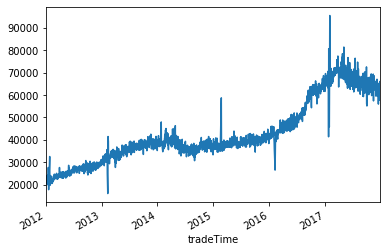

In [33]:
day_price.plot()

In [38]:
#每日成交量
day_count=df.groupby("tradeTime",as_index=False).count()[["tradeTime","price"]]
day_count

,tradeTime,price
0,2012-01-01,38
1,2012-01-02,47
2,2012-01-03,66
3,2012-01-04,38
4,2012-01-05,39
5,2012-01-06,23
6,2012-01-07,59
7,2012-01-08,77
8,2012-01-09,39
9,2012-01-10,24


In [39]:
#处理price
day_count.rename(columns={"price":"count"},inplace=True)
#对成交量排序
day_count.sort_values("count",ascending=False)

,tradeTime,count
1492,2016-02-28,1093
1499,2016-03-06,945
1645,2016-07-31,940
1676,2016-08-31,906
1674,2016-08-29,821
1498,2016-03-05,821
1491,2016-02-27,791
1852,2017-02-27,763
1675,2016-08-30,742
1853,2017-02-28,706


In [41]:
#提取2017年的数据
df["year"]=df["tradeTime"].dt.year
df_2017=df[df["year"]==2017]

In [42]:
df.describe()

,followers,totalPrice,price,square,kitchen,buildingType,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,year
count,311265.000000,311265.000000,311265.000000,311265.000000,311265.000000,309378.000000,311265.000000,3.112650e+05,311256.000000,311256.000000,311256.000000,311265.000000,311265.000000,311265.000000
mean,17.069863,353.223028,44003.920852,83.259672,0.996103,3.008456,4.455936,6.469493e+01,0.578145,0.650314,0.601396,6.760593,63734.182439,2014.860791
std,34.392322,230.715694,21526.584077,37.149135,0.098505,1.270458,1.900800,2.537214e+04,0.493856,0.476872,0.489612,2.810020,22314.926838,1.578769
min,0.000000,50.000000,2541.000000,7.370000,0.000000,0.125000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000,2012.000000
25%,1.000000,208.000000,28524.000000,57.920000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46392.000000,2014.000000
50%,5.000000,298.000000,39153.000000,74.240000,1.000000,4.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59023.000000,2015.000000
75%,19.000000,430.000000,54239.000000,98.640000,1.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000,2016.000000
max,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000,2017.000000


In [44]:
#对房价分区间

#先分桶 
bins=np.arange(50,18150,50)
bins_data=pd.cut(df_2017["totalPrice"],bins)
bins_data

58         (250, 300]
60         (500, 550]
88         (250, 300]
135        (350, 400]
159        (800, 850]
167      (2150, 2200]
219      (1050, 1100]
226        (100, 150]
235        (850, 900]
241        (600, 650]
263        (800, 850]
274      (1700, 1750]
294        (250, 300]
296        (300, 350]
315      (3300, 3350]
335        (350, 400]
352      (2550, 2600]
441        (500, 550]
453      (1450, 1500]
466        (250, 300]
499        (350, 400]
508        (550, 600]
510        (900, 950]
511      (1550, 1600]
523        (350, 400]
561        (300, 350]
568        (200, 250]
570        (800, 850]
603        (600, 650]
605      (1550, 1600]
             ...     
92162      (200, 250]
92163      (700, 750]
92164      (400, 450]
92165      (400, 450]
92167      (450, 500]
92168      (350, 400]
92170      (250, 300]
92171      (400, 450]
92173      (550, 600]
92176      (350, 400]
92177      (350, 400]
92178    (1250, 1300]
92179      (400, 450]
92180      (400, 450]
92181     

In [60]:
#根据分桶分组  看不同价格区间的房子数量
price_houses=df_2017["totalPrice"].groupby(bins_data).count()
price_houses

totalPrice
(50, 100]           87
(100, 150]         142
(150, 200]         620
(200, 250]        1519
(250, 300]        3462
(300, 350]        4744
(350, 400]        5207
(400, 450]        5132
(450, 500]        4128
(500, 550]        3787
(550, 600]        2805
(600, 650]        2307
(650, 700]        1788
(700, 750]        1403
(750, 800]        1049
(800, 850]         898
(850, 900]         724
(900, 950]         561
(950, 1000]        487
(1000, 1050]       297
(1050, 1100]       288
(1100, 1150]       214
(1150, 1200]       207
(1200, 1250]       149
(1250, 1300]       159
(1300, 1350]       137
(1350, 1400]       119
(1400, 1450]        90
(1450, 1500]        97
(1500, 1550]        58
                  ... 
(16600, 16650]       0
(16650, 16700]       0
(16700, 16750]       0
(16750, 16800]       0
(16800, 16850]       0
(16850, 16900]       0
(16900, 16950]       0
(16950, 17000]       0
(17000, 17050]       0
(17050, 17100]       0
(17100, 17150]       0
(17150, 17200]       0


In [61]:
#清洗数据price_houses

#将price_houses转化为数据框
price_houses=pd.DataFrame(price_houses)

#重新设置索引和列名
price_houses.rename(columns={"totalPrice":"houses"},inplace=True)
#drop=False 索引列会被还原为普通列  rop=True 索引列会删除
price_houses.reset_index(drop=False,inplace=True)

price_houses

,totalPrice,houses
0,"(50, 100]",87
1,"(100, 150]",142
2,"(150, 200]",620
3,"(200, 250]",1519
4,"(250, 300]",3462
5,"(300, 350]",4744
6,"(350, 400]",5207
7,"(400, 450]",5132
8,"(450, 500]",4128
9,"(500, 550]",3787


In [63]:
#删除没有的房子
price_houses.drop(price_houses[price_houses["houses"]==0].index,inplace=True)
price_houses

,totalPrice,houses
0,"(50, 100]",87
1,"(100, 150]",142
2,"(150, 200]",620
3,"(200, 250]",1519
4,"(250, 300]",3462
5,"(300, 350]",4744
6,"(350, 400]",5207
7,"(400, 450]",5132
8,"(450, 500]",4128
9,"(500, 550]",3787


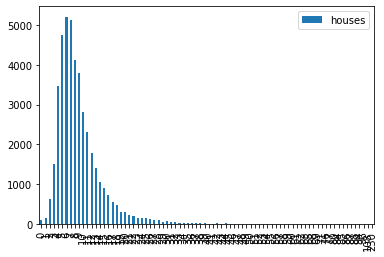

In [64]:
price_houses.plot(kind="bar")

In [66]:
#查看什么价格区间的房子数量最多
price_houses.sort_values("houses",ascending=False)

,totalPrice,houses
6,"(350, 400]",5207
7,"(400, 450]",5132
5,"(300, 350]",4744
8,"(450, 500]",4128
9,"(500, 550]",3787
4,"(250, 300]",3462
10,"(550, 600]",2805
11,"(600, 650]",2307
12,"(650, 700]",1788
3,"(200, 250]",1519
